## Imports

In [1]:
from libpysal.weights.contiguity import Queen
from libpysal.weights import DistanceBand
import libpysal
from libpysal import examples
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
%matplotlib inline

In [2]:
from splot.libpysal import plot_spatial_weights

## Data Preparation

Let's first have a look at the dataset with `libpysal.examples.explain`

Load data into a `geopandas` geodataframe

In [28]:
meshpath = '../../data/interim/Brazil/census_data/2010/weightening_area/digital_mesh/RS.json'
gdf = gpd.read_file(meshpath, index='Cod_ap')
print(len(gdf))
gdf.dropna(inplace=True)
print(len(gdf))
gdf['id'] = gdf['Cod_ap']
gdf.set_index('id', inplace=True)
gdf.head(20)

827
826


,Cod_ap,geometry
id,,
4.300406e+12,4.300406e+12,"POLYGON ((-55.80521 -29.79662, -55.80601 -29.7..."
4.300406e+12,4.300406e+12,"POLYGON ((-55.80020 -29.79791, -55.80115 -29.8..."
4.300406e+12,4.300406e+12,"MULTIPOLYGON (((-55.79087 -29.77392, -55.78886..."
4.300406e+12,4.300406e+12,"POLYGON ((-55.78200 -29.77329, -55.78476 -29.7..."
4.300554e+12,4.300554e+12,"MULTIPOLYGON (((-53.02224 -28.83909, -53.01873..."
4.300570e+12,4.300570e+12,"MULTIPOLYGON (((-51.32731 -29.32966, -51.33645..."
4.300604e+12,4.300604e+12,"POLYGON ((-51.07832 -29.99502, -51.07841 -29.9..."
4.300604e+12,4.300604e+12,"POLYGON ((-51.06141 -30.04037, -51.06122 -30.0..."
4.300604e+12,4.300604e+12,"POLYGON ((-51.06658 -30.01468, -51.06649 -30.0..."


In [32]:
weights = Queen.from_dataframe(gdf)
Wmatrix, ids = weights.full()
Wmatrix = pd.DataFrame(Wmatrix, index=gdf.index.values, columns =gdf.index.values)
Wmatrix.to_csv('../../data/interim/Brazil/census_data/2010/weightening_area/digital_mesh/queen.csv')

In [30]:
weights = DistanceBand.from_dataframe(gdf, threshold=None, build_sp=False, binary=False)
Wmatrix, ids = weights.full()
Wmatrix = pd.DataFrame(Wmatrix, index=gdf.index.values, columns =gdf.index.values)
Wmatrix.to_csv('../../data/interim/Brazil/census_data/2010/weightening_area/digital_mesh/inverse_distance.csv')

### Plotting

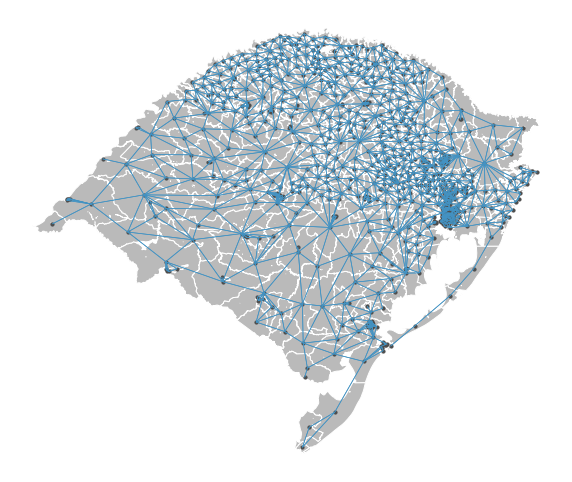

In [33]:
plot_spatial_weights(weights, gdf)
plt.show()